# 1 - Introduction

Nama: Ryan Risyadul Maruf

Batch: FTDS-019-RMT

Dataset: `churn.csv`

Objective: Develop a predictive model that helps a company minimize customer churn by accurately identifying customers who are likely to discontinue the use of the company's offered product.

# 2 - Import Library

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 3 - Data Loading

In [2]:
df = pd.read_csv('/content/churn.csv')

In [3]:
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [4]:
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [5]:
# Check for missing values

print(df.isnull().sum())

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64


## 3.1 - Drop Irrelevant Columns

In [6]:
# Drop irrelevant columns

df.drop(['user_id'], axis=1, inplace=True)
df

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [7]:
# Get Numerica Coulumns and Categorical Coulumns

num_coulumns = df.select_dtypes(include=np.number).columns.tolist()
cat_coulumns = df.select_dtypes(include=['object']).columns.tolist()

print('Numerical Coulums :', num_coulumns)
print('Categorical Coulums :', cat_coulumns)

Numerical Coulums : ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
Categorical Coulums : ['gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


Based on personal assumptions, there are columns that do not have a correlation with the model, such as user_id, and we could first drop this column.

## 3.2 - Handle Duplicated Value

In [8]:
# Search duplicated values

len(df[df.duplicated()])

18

In [9]:
# Drop duplicated values

df = df.drop_duplicates()

In [10]:
# Verify duplicated values

len(df[df.duplicated()])

0

In [11]:
# Check Dataset - 1

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36933 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       31554 non-null  object 
 6   preferred_offer_types         36704 non-null  object 
 7   medium_of_operation           31599 non-null  object 
 8   internet_option               36992 non-null  object 
 9   last_visit_time               36992 non-null  object 
 10  days_since_last_login         36992 non-null  int64  
 11  avg_time_spent                36992 non-null  float64
 12  avg_transaction_value         36992 non-null  float64
 13  a

In [12]:
# Check Dataset - 2

df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,279.147450,29271.194003,14.658617,623.562421,0.540982
std,15.867412,228.819900,329.947709,19444.806226,9.479184,270.263994,0.498324
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,7.000000,574.135000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,14.000000,680.370000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


# 4 - Exploratory Data Analysis (EDA)

## 4.1 - Insight from Data

### 4.1.1 - Churn Distribution

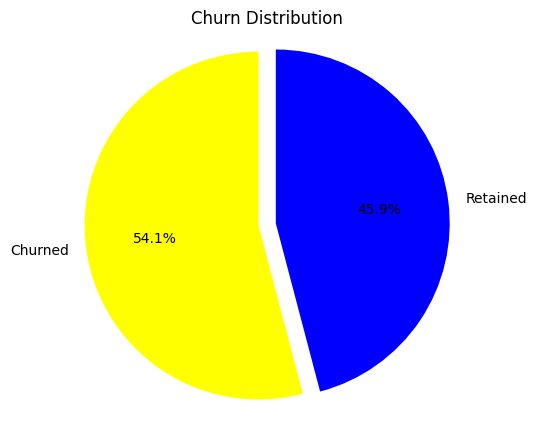

In [13]:
# Churn Distribution

plt.figure(figsize=(5, 5))
colors = ['#FFFF00', '#0000FF']

churn_counts = df['churn_risk_score'].value_counts()
labels = ['Churned', 'Retained']

explode = (0, 0.1)

plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()

In [14]:
total_exited = df['churn_risk_score'].sum()
total_retained = len(df) - total_exited

print("Total Exited Customers: {}".format(total_exited))
print("Total Retained Customers: {}".format(total_retained))

Total Exited Customers: 20012
Total Retained Customers: 16980


Based on the provided result:

1. Total Exited Customers: The number of exited customers is 20,012 **(54.1%)**. These are customers who have chosen to end their relationship or discontinue using the product or service.

2. Total Retained Customers: The number of retained customers is 16,980 **(45.9%)**. These are customers who have remained loyal and continue to use the product or service.

Based on this insight, it appears that the company may be experiencing a relatively high churn rate and a lower retention rate. This suggests that efforts should be made to improve customer retention strategies, such as enhancing customer satisfaction, addressing any issues that may be causing customers to leave, and implementing customer loyalty programs to encourage repeat business.

### 4.1.2 - Churn rate by Age

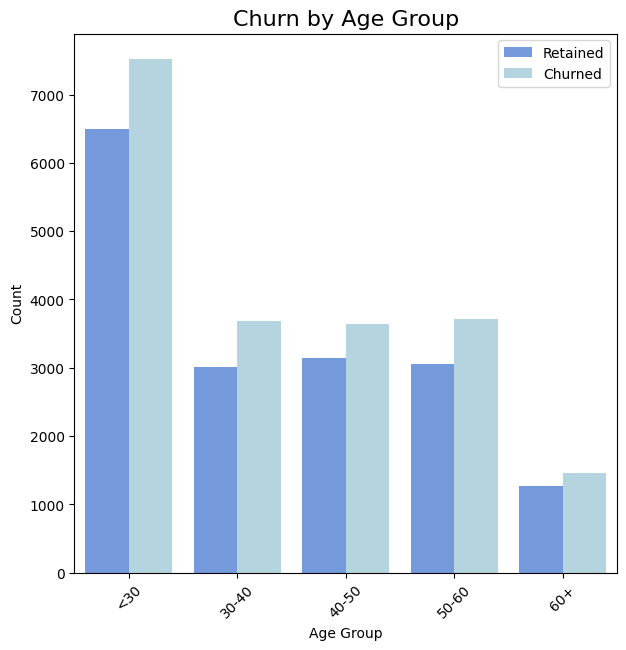

In [15]:
# Churn by Age

df_age_group = df.copy()
df_age_group['AgeGroup'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])

plt.figure(figsize=(7, 7))
ax = sns.countplot(x='AgeGroup', hue='churn_risk_score', data=df_age_group, palette=['#6495ED', '#ADD8E6'])

plt.xlabel('Age Group')
plt.ylabel('Count')
ax.legend(['Retained', 'Churned'], loc='upper right')
plt.title('Churn by Age Group', fontsize=16)
plt.xticks(rotation=45)

plt.show()

In [16]:
# Churn rate by Age 

churn_rate_age = (df_age_group.groupby('AgeGroup')['churn_risk_score'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_age.apply(lambda x: f"{x}%")))

Exited Customers: AgeGroup
<30      53.62%
30-40    54.97%
40-50     53.7%
50-60    54.87%
60+      53.46%
Name: churn_risk_score, dtype: object


Based on the given result:

- Customers below the age of 30: 53.62% have exited.
- Customers aged between 30 and 40: 54.97% have exited.
- Customers aged between 40 and 50: 53.7% have exited.
- Customers aged between 50 and 60: 54.87% have exited.
- Customers aged 60 or above: 53.46% have exited.

These percentages suggest that there is a relatively similar trend in customer churn across different age groups, with the churn rates ranging from approximately 53% to 55%. It does not show any significant variation in the churn rate based on age alone.

### 4.1.3 - Churn rate by Gender

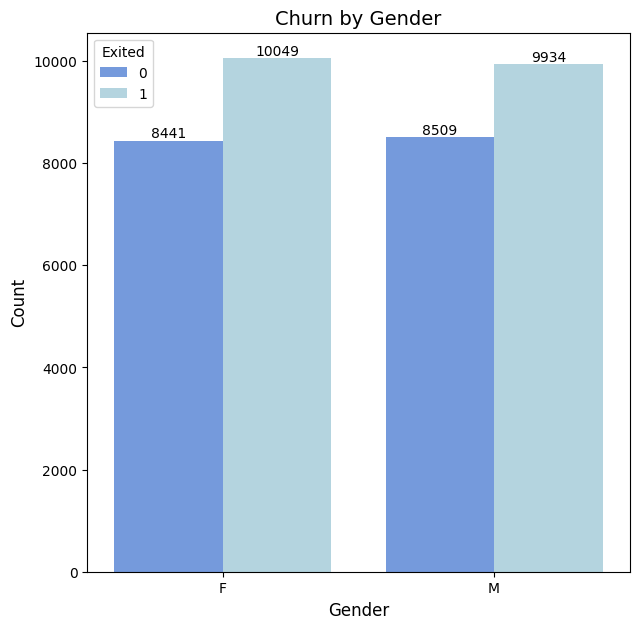

In [17]:
# Churn by gender

churned_color = '#ADD8E6'
non_churned_color = '#6495ED'

plt.figure(figsize=(7, 7))
sns.barplot(x='gender', y='churn_risk_score', data=df, hue='churn_risk_score', estimator=len, palette=[non_churned_color, churned_color])
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Gender', fontsize=14)
plt.legend(title='Exited', loc='best')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [18]:
# Churn rate by gender

churn_rate_gender = (df.groupby('gender')['churn_risk_score'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_gender.apply(lambda x: f"{x}%")))

Exited Customers: gender
F    54.35%
M    53.86%
Name: churn_risk_score, dtype: object


Based on the given result:

   - Female (F): 54.35%
   - Male (M): 53.86%

Since the percentages are quite close, it indicates a relatively balanced representation of both male and female customers in terms of churn risk.

### 4.1.4 - Churn rate by Region Category

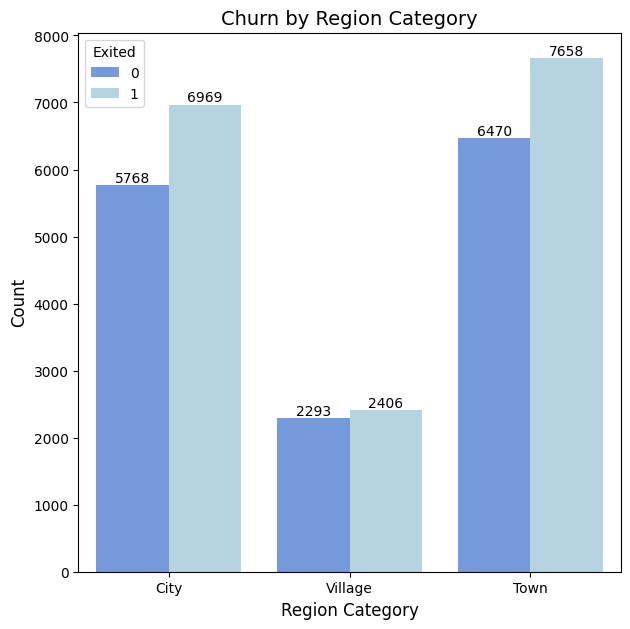

In [19]:
# Churn by Region Category

churned_color = '#ADD8E6'
non_churned_color = '#6495ED'

plt.figure(figsize=(7, 7))
sns.barplot(x='region_category', y='churn_risk_score', data=df, hue='churn_risk_score', estimator=len, palette=[non_churned_color, churned_color])
plt.xlabel('Region Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Region Category', fontsize=14)
plt.legend(title='Exited', loc='best')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [20]:
# Churn by Region Category

churn_rate_gender = (df.groupby('region_category')['churn_risk_score'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_gender.apply(lambda x: f"{x}%")))

Exited Customers: region_category
City       54.71%
Town        54.2%
Village     51.2%
Name: churn_risk_score, dtype: object


From the given result:

1. City: The percentage of customers who have exited in the *City* region category is **54.71%**. This suggests that a significant portion of customers in urban areas, categorized as cities, have churned or stopped using the service.

2. Town: The percentage of customers who have exited in the *Town* region category is **54.2%**. This indicates that a similar proportion of customers in less populated areas, categorized as towns, have also churned.

3. Village: The percentage of customers who have exited in the *Village* region category is **51.2%**. This implies that customers in rural areas, specifically villages, have churned at a slightly lower rate compared to customers in cities and towns.

Overall, the insights suggest that customer churn is relatively high across all region categories, with the highest churn rate observed in cities.

### 4.1.5 - Churn rate by Membership Category

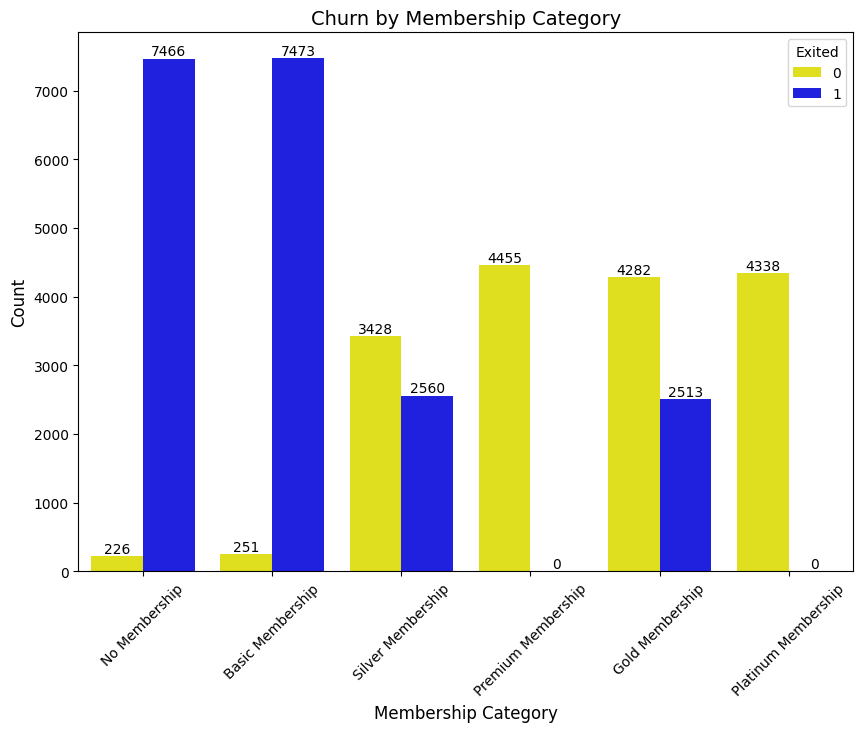

In [21]:
# Churn by Membership Category

churned_color = '#0000FF'
non_churned_color = '#FFFF00'

plt.figure(figsize=(10, 7))
sns.barplot(x='membership_category', y='churn_risk_score', data=df, hue='churn_risk_score', estimator=len, palette=[non_churned_color, churned_color])
plt.xlabel('Membership Category', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Membership Category', fontsize=14)
plt.legend(title='Exited', loc='best')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [22]:
# Churn by Membership Category

churn_rate_gender = (df.groupby('membership_category')['churn_risk_score'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_gender.apply(lambda x: f"{x}%")))

Exited Customers: membership_category
Basic Membership       96.75%
Gold Membership        36.98%
No Membership          97.06%
Platinum Membership      0.0%
Premium Membership       0.0%
Silver Membership      42.75%
Name: churn_risk_score, dtype: object


The analysis reveals the customer churn rates based on different membership categories:

1. Basic Membership: A significant proportion of customers with basic membership, approximately 96.75%, have decided to leave the service. This indicates a high churn rate among basic members.

2. Gold Membership: The churn rate for customers with gold membership is relatively lower at 36.98% compared to basic membership. This suggests that gold members are more likely to remain with the service.

3. No Membership: The majority of customers without any membership, around 97.06%, have churned. This implies that customers who are not subscribed to any specific membership category are highly prone to leaving the service.

4. Platinum Membership: None of the customers with platinum membership have churned. This indicates a strong retention rate among platinum members, as no customers from this category have left the service.

5. Premium Membership: Similar to platinum membership, the churn rate for customers with premium membership is 0.0%. This means that all customers with premium membership have remained with the service.

6. Silver Membership: Customers with silver membership have a churn rate of 42.75%, which is higher compared to gold membership. This suggests that silver members are more likely to churn than gold members.

These percentages provide valuable insights into customer retention rates across different membership levels. The data highlights the need for further investigation and improvement, particularly in retaining **basic** and **silver** members, as they have higher churn rates. On the other hand, the analysis showcases the success in retaining customers with **platinum** and premium memberships, as none have churned.

### 4.1.6 - Monthly Number of Customers Joining the Company

In [23]:
df_joining_date = df.copy()

df_joining_date['joining_date'] = pd.to_datetime(df_joining_date['joining_date'])

df_joining_date.set_index('joining_date', inplace=True)

# Monthly resampling example
df_monthly = df_joining_date.resample('M').size()

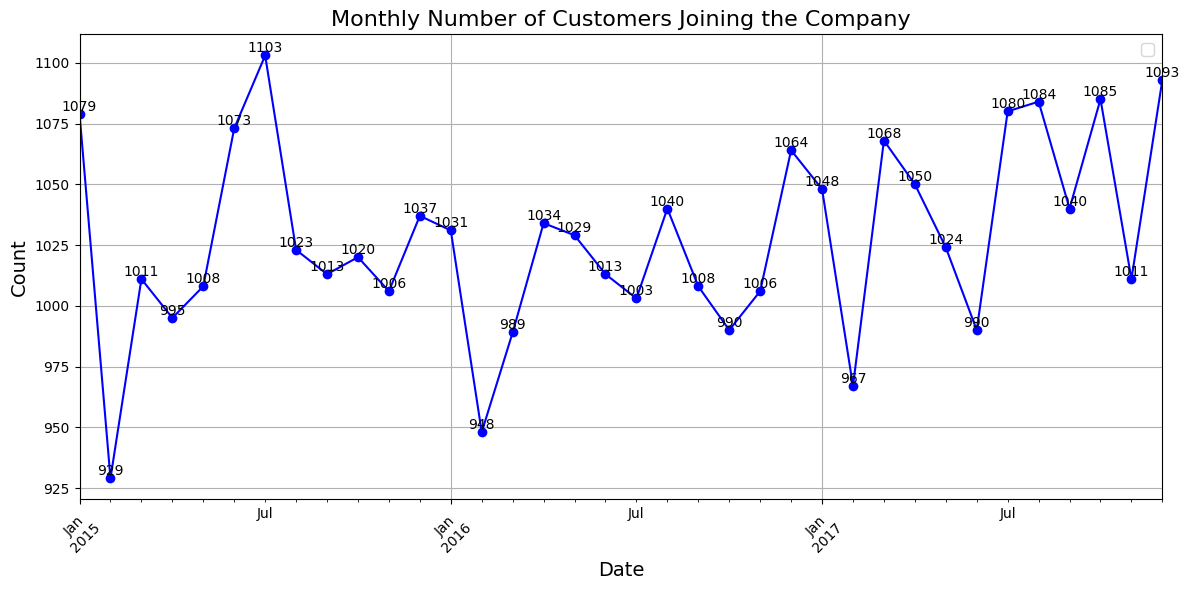

In [24]:
plt.figure(figsize=(12, 6))  # Adjusted figure size
df_monthly.plot(kind='line', marker='o', linestyle='-', color='#0000FF')

# Add count labels and month
for i, count in enumerate(df_monthly):
    plt.text(df_monthly.index[i], count, str(count), ha='center', va='bottom', fontsize=10)  # Add count label

plt.xlabel('Date', fontsize=14)  # Reduced font size
plt.ylabel('Count', fontsize=14)  # Reduced font size
plt.title('Monthly Number of Customers Joining the Company', fontsize=16)  # Adjusted title size and wording
plt.xticks(rotation=45)
plt.legend(fontsize=12)  # Reduced font size
plt.grid(True)
plt.tight_layout()
plt.show()

Here are some observations from the data:

1. The number of joinings fluctuates over time. There are variations in the count of joinings from month to month.

2. The number of joinings in January 2015 (1079) is relatively high compared to the subsequent months.

3. There is a general decreasing trend in the number of joinings from January 2015 to February 2016. The count of joinings drops to its lowest point in February 2016 (948) before starting to rise again.

4. From February 2016 to December 2016, the number of joinings remains relatively stable, with some fluctuations around the 1000 mark.

5. There is a notable increase in joinings from January 2017 to March 2017. The count rises to its highest point in March 2017 (1068) during this period.

6. The number of joinings fluctuates again from April 2017 to December 2017, with some months showing higher counts (e.g., July 2017 with 1080 joinings, October 2017 with 1085 joinings) and others showing lower counts.

### 4.1.7 - Average Transaction Value Distribution

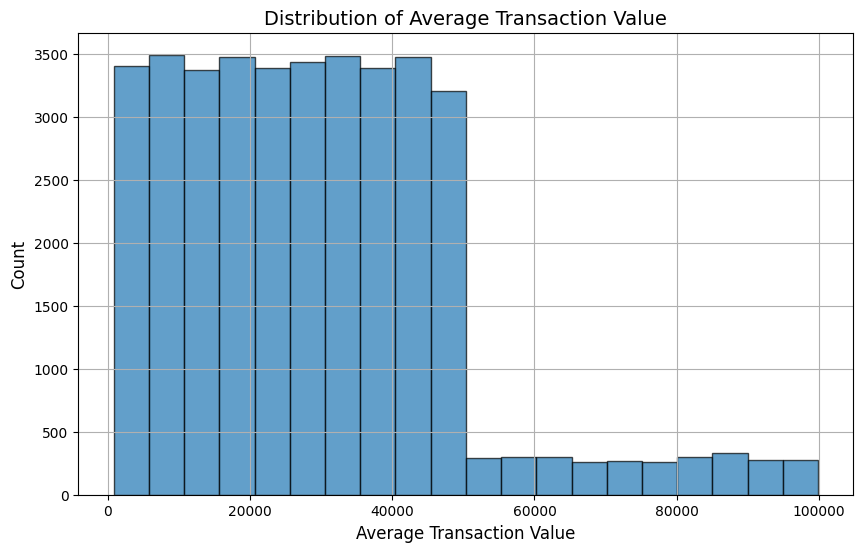

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['avg_transaction_value'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Average Transaction Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Average Transaction Value', fontsize=14)
plt.grid(True)
plt.show()

In [26]:
df['avg_transaction_value'].sum()

1082800008.56

In [27]:
# Average Frequency Login Days Distribution

df['avg_transaction_value'].describe()

count    36992.000000
mean     29271.194003
std      19444.806226
min        800.460000
25%      14177.540000
50%      27554.485000
75%      40855.110000
max      99914.050000
Name: avg_transaction_value, dtype: float64

Here are some additional insights that can be gained from this visualization:

1. The majority of users have average transaction values that are between 1,000 and 3,000 USD.

2. There is a small number of users who have average transaction values that are significantly higher than the rest of the users. These users may be considered high-value customers, and they may be targeted with marketing campaigns or other initiatives to encourage them to continue using the service.

3. The average transaction value has increased over time. This may be due to a number of factors, such as increased competition, new features and services, or changes in the economy.

### 4.1.8 - Average Frequency Login Days Distribution

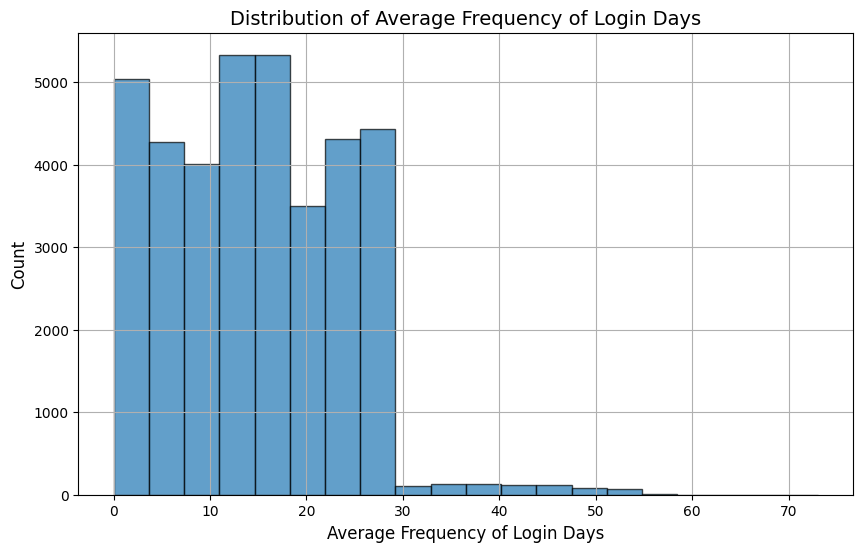

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['avg_frequency_login_days'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Average Frequency of Login Days', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Average Frequency of Login Days', fontsize=14)
plt.grid(True)
plt.show()

In [29]:
# Churn Average Frequency Login Days Distribution

df['avg_frequency_login_days'].describe()

count    36992.000000
mean        14.658617
std          9.479184
min          0.000000
25%          7.000000
50%         14.000000
75%         22.000000
max         73.061995
Name: avg_frequency_login_days, dtype: float64

The dataset contains 36,992 data points related to the variable "avg_frequency_login_days." On average, users log in approximately 14.66 times during a specific period. These statistics provide insights into the distribution and range of average login frequencies for users in the dataset.

### 4.1.9 - Churn rate by Complaint Status

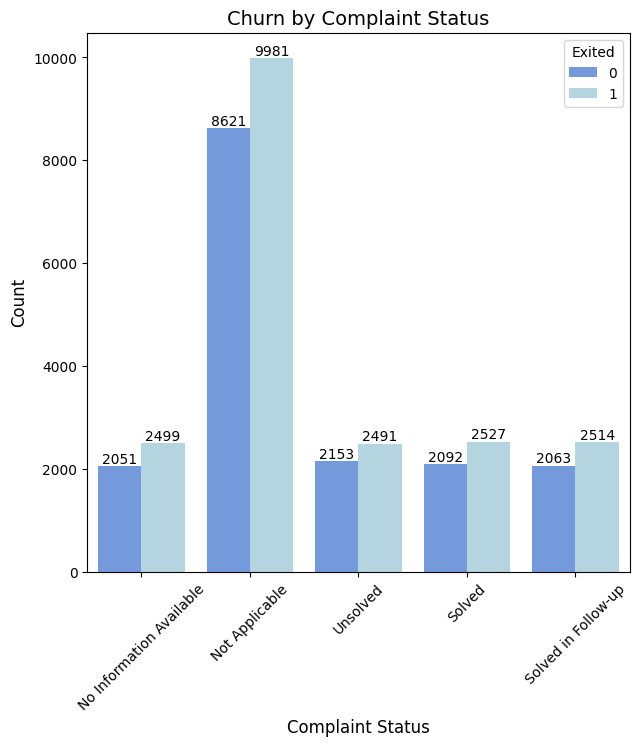

In [30]:
# Churn by Average Complaint Status

churned_color = '#ADD8E6'
non_churned_color = '#6495ED'

plt.figure(figsize=(7, 7))
sns.barplot(x='complaint_status', y='churn_risk_score', data=df, hue='churn_risk_score', estimator=len, palette=[non_churned_color, churned_color])
plt.xlabel('Complaint Status', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Complaint Status', fontsize=14)
plt.legend(title='Exited', loc='best')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [31]:
# Churn by Complaint Status

churn_rate_gender = (df.groupby('complaint_status')['churn_risk_score'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_gender.apply(lambda x: f"{x}%")))

Exited Customers: complaint_status
No Information Available    54.92%
Not Applicable              53.66%
Solved                      54.71%
Solved in Follow-up         54.93%
Unsolved                    53.64%
Name: churn_risk_score, dtype: object


From the given result, the categories mentioned in the result are:

1. No Information Available: This category represents cases where there is no information or data available regarding the complaint status of the exited customers. It accounts for approximately 54.92% of the total exited customers.

2. Not Applicable: This category suggests that the complaint status is not applicable or relevant to the exited customers. It comprises around 53.66% of the total exited customers. This could mean that these customers did not have any specific complaints or issues before leaving.

3. Solved: This category indicates that the complaints or issues raised by the exited customers were resolved successfully. Approximately 54.71% of the exited customers fall into this category, suggesting that their concerns were addressed, and they were satisfied with the resolution.

4. Solved in Follow-up: This category represents cases where the complaints or issues raised by the exited customers were initially not resolved, but they were eventually resolved in a follow-up interaction. It accounts for about 54.93% of the total exited customers.

5. Unsolved: This category suggests that the complaints or issues raised by the exited customers remained unresolved. It comprises around 53.64% of the total exited customers, indicating that a significant portion of customers who left had unresolved concerns.

Overall, the results suggest that a significant portion of exited customers had unresolved concerns. This is a cause for concern, as it suggests that the company is not doing enough to address customer complaints. The company should take steps to improve its complaint handling process and ensure that all customer concerns are resolved in a timely and satisfactory manner.

### 4.1.10 - Churn rate by Feedback

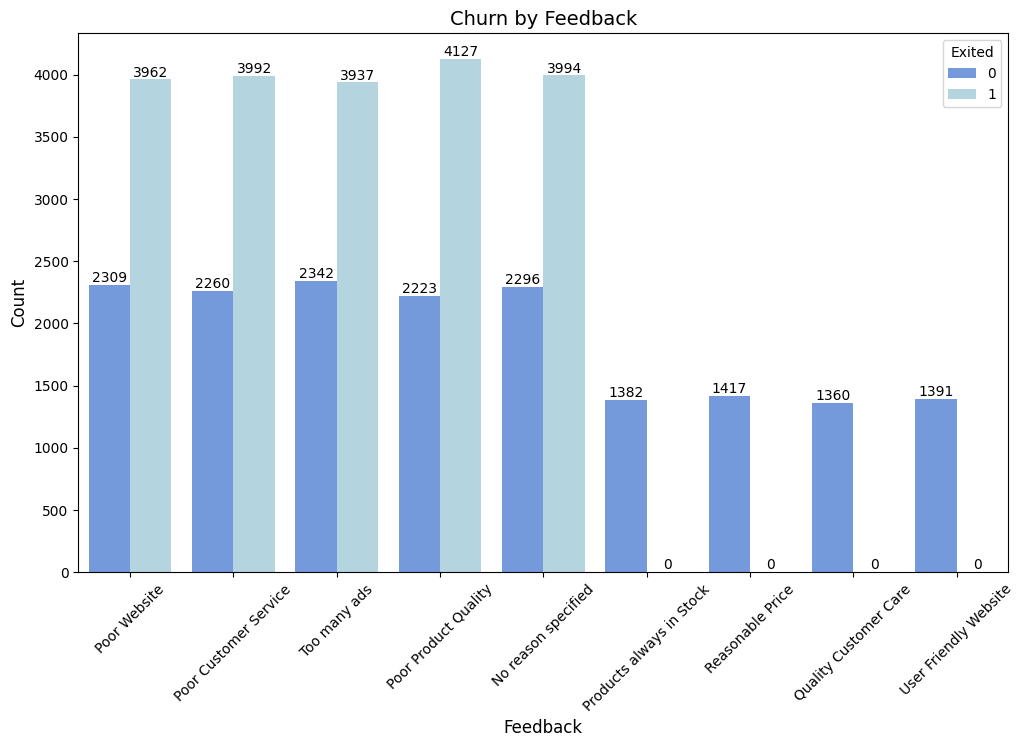

In [32]:
# Churn by Average Feedback

churned_color = '#ADD8E6'
non_churned_color = '#6495ED'

plt.figure(figsize=(12, 7))
sns.barplot(x='feedback', y='churn_risk_score', data=df, hue='churn_risk_score', estimator=len, palette=[non_churned_color, churned_color])
plt.xlabel('Feedback', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=12)
plt.title('Churn by Feedback', fontsize=14)
plt.legend(title='Exited', loc='best')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [33]:
# Churn by Complaint Status

churn_rate_gender = (df.groupby('feedback')['churn_risk_score'].mean() * 100).round(2)
print("Exited Customers: {}".format(churn_rate_gender.apply(lambda x: f"{x}%")))

Exited Customers: feedback
No reason specified          63.5%
Poor Customer Service       63.85%
Poor Product Quality        64.99%
Poor Website                63.18%
Products always in Stock      0.0%
Quality Customer Care         0.0%
Reasonable Price              0.0%
Too many ads                 62.7%
User Friendly Website         0.0%
Name: churn_risk_score, dtype: object


Based on the given result:

1. No reason specified: 63.5%
   - The majority of the exited customers did not provide a specific reason for leaving. This could indicate a missed opportunity to gather valuable feedback or dissatisfaction with the exit process.

2. Poor Customer Service: 63.85%
   - A significant percentage of customers cited poor customer service as a reason for their departure. This suggests that the quality of customer service provided by the company needs improvement to retain customers.

3. Poor Product Quality: 64.99%
   - A high percentage of customers mentioned poor product quality as a reason for leaving. This implies that the company's products did not meet the customers' expectations or had issues, leading to dissatisfaction.

4. Poor Website: 63.18%
   - A considerable number of customers attributed their departure to a poor website experience. This could refer to difficulties in navigating the website, slow loading times, or other usability issues that hindered their satisfaction.

5. Products always in Stock: 0.0%
   - None of the exited customers mentioned products always being in stock as a reason for leaving. This could suggest that product availability was not a significant concern for the customers who left.

6. Quality Customer Care: 0.0%
   - None of the exited customers mentioned quality customer care as a reason for their departure. This could indicate that customer care was not a primary factor influencing their decision to leave.

7. Reasonable Price: 0.0%
   - None of the exited customers cited reasonable price as a reason for their departure. This suggests that pricing might not have been a major concern for these customers.

8. Too many ads: 62.7%
   - A significant percentage of customers mentioned being overwhelmed by too many ads as a reason for leaving. This indicates that the company's advertising strategy might have had a negative impact on customer experience and contributed to churn.

9. User Friendly Website: 0.0%
   - None of the exited customers mentioned a lack of user-friendly website as a reason for leaving. This implies that website usability might not have been a significant factor in their decision to churn.

Overall, the insights suggest that poor customer service, product quality, and website experience were prominent factors contributing to customer churn. Additionally, the presence of too many ads seemed to have negatively affected customer retention.

## 4.2 Feature Selection

### 4.4.1 - Searching Correlation — Phik (𝜙k)

In [34]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [36]:
df_phik = df.copy()

In [37]:
%%time

phik_overview = df_phik.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable joining_date is large: 1096. Are you sure this is not an interval variable? Analysis for pairs of variables including joining_date can be slow.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable last_visit_time is large: 30101. Are you sure this is not an interval variable? Analysis for pairs of variables including last_visit_time can be slow.
  warnings.warn(


CPU times: user 2.72 s, sys: 296 ms, total: 3.01 s
Wall time: 4min 57s


,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
age,1.00,0.00,0.00,0.00,0.06,0.00,0.01,0.01,0.02,0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.00
gender,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,...,0.00,0.00,0.02,0.02,0.00,0.00,0.01,0.00,0.01,0.00
region_category,0.00,0.00,1.00,0.04,0.00,0.00,0.02,0.00,0.01,0.22,...,0.01,0.04,0.02,0.01,0.00,0.00,0.00,0.01,0.08,0.01
membership_category,0.00,0.00,0.04,1.00,0.02,0.05,0.06,0.04,0.01,0.18,...,0.01,0.24,0.10,0.33,0.01,0.02,0.01,0.00,0.36,0.94
joining_date,0.06,0.00,0.00,0.02,1.00,0.00,0.00,0.04,0.00,0.00,...,0.00,0.00,0.03,0.00,0.00,0.01,0.04,0.07,0.00,0.00
joined_through_referral,0.00,0.00,0.00,0.05,0.00,1.00,0.00,0.04,0.00,0.12,...,0.29,0.07,0.02,0.02,0.03,0.03,0.00,0.01,0.07,0.06
preferred_offer_types,0.01,0.00,0.02,0.06,0.00,0.00,1.00,0.00,0.00,0.00,...,0.02,0.07,0.03,0.02,0.00,0.00,0.00,0.01,0.15,0.03
medium_of_operation,0.01,0.00,0.00,0.04,0.04,0.04,0.00,1.00,0.00,0.00,...,0.39,0.05,0.02,0.01,0.04,0.03,0.00,0.00,0.09,0.01
internet_option,0.02,0.00,0.01,0.01,0.00,0.00,0.00,0.00,1.00,0.25,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00
last_visit_time,0.05,0.07,0.22,0.18,0.00,0.12,0.00,0.00,0.25,1.00,...,0.00,0.25,0.00,0.82,0.11,0.16,0.09,0.00,0.00,0.18


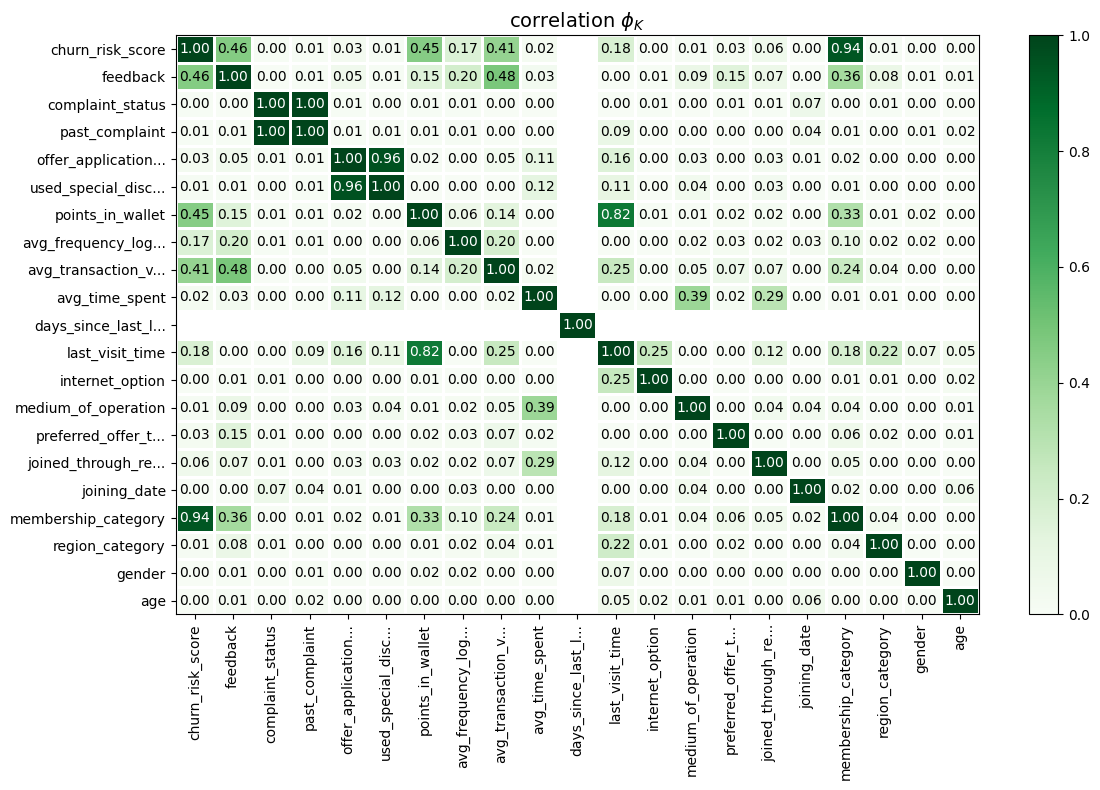

In [38]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview .columns, 
                        y_labels=phik_overview .index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(12, 8))
plt.tight_layout()

Based on the correlation matrix with the target variable 'churn_risk_score', we can identify the columns with weak correlations. The correlation values range from -1 to 1, where values close to -1 indicate a strong negative correlation, values close to 1 indicate a strong positive correlation, and values close to 0 indicate a weak or no correlation.

Looking at the correlations with 'churn_risk_score', the following variables have strong correlations (absolute values more than 0.1):

- `membership_category`
- `avg_transaction_value`
- `point_in_wallet`
- `feedback`

These variables show strong correlations with the 'churn_risk_score' target variable and may have a significant impact on predicting whether a customer will exit or not.

In [39]:
# Drop Column based on Phik

df_drop = df.copy()

cols_to_drop = ['age',
                'gender',
                'region_category',
                'joining_date',
                'joined_through_referral',
                'preferred_offer_types',
                'medium_of_operation',
                'internet_option',
                'last_visit_time',
                'days_since_last_login',
                'avg_time_spent',
                'avg_frequency_login_days',
                'used_special_discount',
                'offer_application_preference',
                'past_complaint',
                'complaint_status']

df_drop.drop(columns=cols_to_drop, inplace=True)
df_drop

,membership_category,avg_transaction_value,points_in_wallet,feedback,churn_risk_score
0,No Membership,38604.69,627.48,Poor Website,1
1,Basic Membership,7665.66,575.97,Poor Customer Service,1
2,Silver Membership,37671.69,767.93,Too many ads,0
3,No Membership,15678.14,590.22,Too many ads,1
4,Silver Membership,8422.68,722.04,Poor Product Quality,0
...,...,...,...,...,...
37005,Gold Membership,29455.29,846.52,User Friendly Website,0
37006,Gold Membership,27038.47,835.98,Reasonable Price,0
37007,Gold Membership,39305.35,714.90,Poor Customer Service,0
37008,Gold Membership,46108.73,744.99,Poor Website,0


## 4.2 - Handling Missing Value in Target

In [40]:
df_drop['churn_risk_score'].isnull().sum()

0

There are no missing value in target

## 4.3 - Handling Cardinality

In [41]:
# Check each unique value per categorical variable

import pandas as pd

def print_unique_values(df):
    for col in df.select_dtypes(include='object').columns:
        print(f"Unique values in '{col}':")
        print(df[col].unique())

print_unique_values(df_drop)

Unique values in 'membership_category':
['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership']
Unique values in 'feedback':
['Poor Website' 'Poor Customer Service' 'Too many ads'
 'Poor Product Quality' 'No reason specified' 'Products always in Stock'
 'Reasonable Price' 'Quality Customer Care' 'User Friendly Website']


There are some unique value in some cateorical variable such as: 

- `membership_category`
- `feedback`

This categorical variable need to preprocess (encode) for train the models

# 5 - Feature Engineering

## 5.1 Splitting between Train-Set, Val-Set, and Test-Set

In [42]:
# Splitting between 'X and 'y'

X = df_drop.drop('churn_risk_score', axis=1)
y = df_drop['churn_risk_score']

In [43]:
X

,membership_category,avg_transaction_value,points_in_wallet,feedback
0,No Membership,38604.69,627.48,Poor Website
1,Basic Membership,7665.66,575.97,Poor Customer Service
2,Silver Membership,37671.69,767.93,Too many ads
3,No Membership,15678.14,590.22,Too many ads
4,Silver Membership,8422.68,722.04,Poor Product Quality
...,...,...,...,...
37005,Gold Membership,29455.29,846.52,User Friendly Website
37006,Gold Membership,27038.47,835.98,Reasonable Price
37007,Gold Membership,39305.35,714.90,Poor Customer Service
37008,Gold Membership,46108.73,744.99,Poor Website


In [44]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20)

print('Train Size :', X_train.shape)
print('Val Size :', X_val.shape)
print('Test Size :', X_test.shape)

Train Size : (26726, 4)
Val Size : (4717, 4)
Test Size : (5549, 4)


## 5.2 Handling Missing Value

In [45]:
# Check Missing Values on X_train

X_train.isnull().sum()

membership_category      0
avg_transaction_value    0
points_in_wallet         0
feedback                 0
dtype: int64

In [46]:
# Check Missing Values on X_val

X_val.isnull().sum()

membership_category      0
avg_transaction_value    0
points_in_wallet         0
feedback                 0
dtype: int64

In [47]:
# Check Missing Values on X_test

X_test.isnull().sum()

membership_category      0
avg_transaction_value    0
points_in_wallet         0
feedback                 0
dtype: int64

## 5.4 Get Numerica Coulumns and Categorical Coulumns

In [48]:
# Get Numerica Coulumns and Categorical Coulumns

num_coulumns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_coulumns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Coulums :', num_coulumns)
print('Categorical Coulums :', cat_coulumns)

Numerical Coulums : ['avg_transaction_value', 'points_in_wallet']
Categorical Coulums : ['membership_category', 'feedback']


## 5.5 - Pipeline

In [49]:
# Create A Pipeline

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_coulumns),
    ('pipe_cat', cat_pipeline, cat_coulumns)
])

In [50]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

In [51]:
X_train.shape

(26726, 17)

# 6 - Model Definition

## A - Sequensial API

In [52]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [53]:
# Create Sequensial API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_sequential = Sequential()
model_sequential.add(Dense(16, 
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(17,))) # Hidden Layer 1
model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed)))  # Hidden Layer 2
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))  # Output Layer
# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                288       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


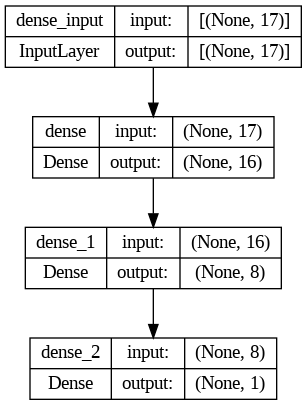

In [54]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## B - Functional API

In [55]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [56]:
# Create Functional API

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

input_layer = Input(shape=(17,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           288         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 25)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

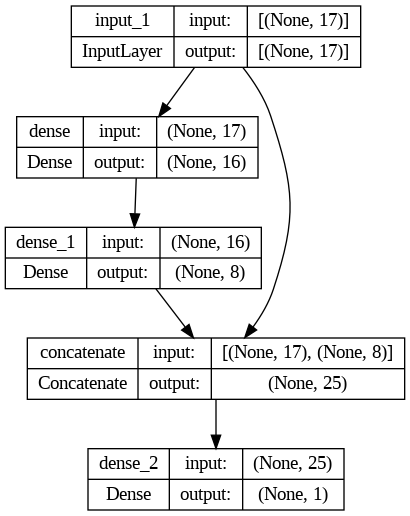

In [57]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

# 7 - Model Training 

## A - Sequensial API

In [ ]:
%%time

# Convert sparse input data to dense arrays

X_train_dense = X_train.toarray()
X_val_dense = X_val.toarray()

# Training the Model

history_seq = model_sequential.fit(X_train_dense,
                                   y_train,
                                   epochs=20,
                                   validation_data=(X_val_dense, y_val),
                                   batch_size=16)

Epoch 1/20
1671/1671 [==============================] - 4s 2ms/step - loss: 0.3310 - accuracy: 0.8417 - val_loss: 0.2610 - val_accuracy: 0.8908
Epoch 2/20
1671/1671 [==============================] - 4s 2ms/step - loss: 0.2465 - accuracy: 0.8931 - val_loss: 0.2480 - val_accuracy: 0.8940
Epoch 3/20
1671/1671 [==============================] - 4s 2ms/step - loss: 0.2309 - accuracy: 0.9093 - val_loss: 0.2289 - val_accuracy: 0.9175
Epoch 4/20
1671/1671 [==============================] - 6s 3ms/step - loss: 0.2081 - accuracy: 0.9241 - val_loss: 0.2070 - val_accuracy: 0.9216
Epoch 5/20
1671/1671 [==============================] - 4s 3ms/step - loss: 0.1918 - accuracy: 0.9269 - val_loss: 0.1969 - val_accuracy: 0.9237
Epoch 6/20
1671/1671 [==============================] - 5s 3ms/step - loss: 0.1814 - accuracy: 0.9277 - val_loss: 0.1903 - val_accuracy: 0.9256
Epoch 7/20
1671/1671 [==============================] - 5s 3ms/step - loss: 0.1765 - accuracy: 0.9274 - val_loss: 0.1837 - val_accuracy:

## B - Functional API

In [ ]:
%%time

# Convert sparse input data to dense arrays

X_train_dense = X_train.toarray()
X_val_dense = X_val.toarray()

# Training the Model

history_func = model_functional.fit(X_train_dense,
                                   y_train,
                                   epochs=20,
                                   validation_data=(X_val_dense, y_val),
                                   batch_size=16)

Epoch 1/20
1671/1671 [==============================] - 4s 2ms/step - loss: 0.3610 - accuracy: 0.8132 - val_loss: 0.2562 - val_accuracy: 0.8955
Epoch 2/20
1671/1671 [==============================] - 2s 1ms/step - loss: 0.2418 - accuracy: 0.9018 - val_loss: 0.2395 - val_accuracy: 0.9025
Epoch 3/20
1671/1671 [==============================] - 2s 1ms/step - loss: 0.2201 - accuracy: 0.9187 - val_loss: 0.2152 - val_accuracy: 0.9222
Epoch 4/20
1671/1671 [==============================] - 2s 1ms/step - loss: 0.1979 - accuracy: 0.9252 - val_loss: 0.1990 - val_accuracy: 0.9237
Epoch 5/20
1671/1671 [==============================] - 2s 1ms/step - loss: 0.1873 - accuracy: 0.9276 - val_loss: 0.1935 - val_accuracy: 0.9239
Epoch 6/20
1671/1671 [==============================] - 3s 2ms/step - loss: 0.1806 - accuracy: 0.9273 - val_loss: 0.1898 - val_accuracy: 0.9250
Epoch 7/20
1671/1671 [==============================] - 2s 1ms/step - loss: 0.1766 - accuracy: 0.9278 - val_loss: 0.1847 - val_accuracy:

# 8 - Model Evaluation

## A - Sequensial API

In [ ]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.331023,0.841690,0.260973,0.890820
1,0.246472,0.893063,0.247986,0.894000
2,0.230868,0.909302,0.228881,0.917532
3,0.208054,0.924081,0.206965,0.921560
4,0.191784,0.926888,0.196944,0.923680
5,0.181357,0.927711,0.190291,0.925588
6,0.176546,0.927374,0.183685,0.922196
7,0.172738,0.927599,0.181323,0.923468
8,0.170541,0.927823,0.182464,0.922832
9,0.168689,0.927411,0.179771,0.923044


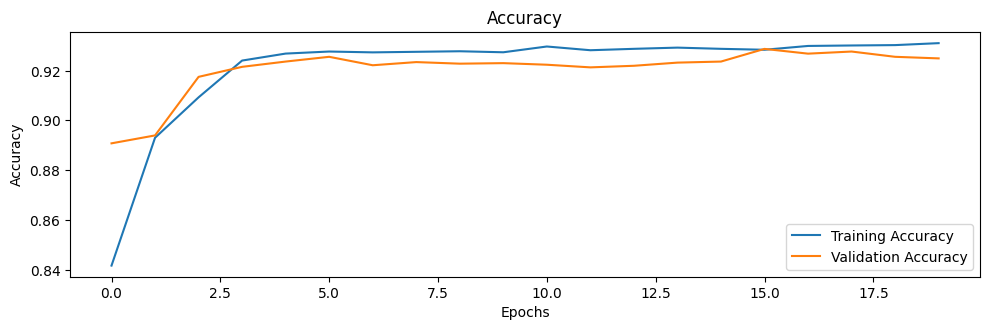

In [ ]:
# Plot the training accuracy and validation accuracy

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)  # First subplot
plt.plot(history_seq_df['accuracy'], label='Training Accuracy')
plt.plot(history_seq_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()

plt.show()

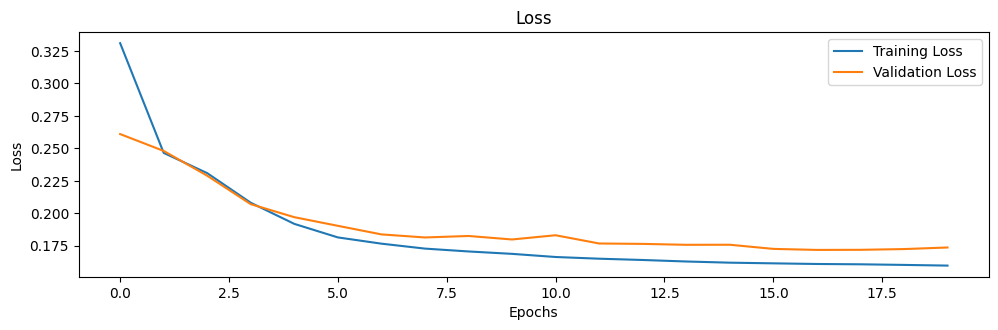

In [ ]:
# Plot the training loss and validation loss

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)  # Second subplot
plt.plot(history_seq_df['loss'], label='Training Loss')
plt.plot(history_seq_df['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# Model Evaluation of test-set

from sklearn.metrics import classification_report

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >=  0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 0s 963us/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2514
           1       0.91      0.96      0.94      3035

    accuracy                           0.93      5549
   macro avg       0.93      0.92      0.93      5549
weighted avg       0.93      0.93      0.93      5549



Based on these observations, the model appears to be performing well and is not exhibiting clear signs of overfitting or underfitting. 

Overall, the model shows good performance with high precision, recall, and F1-score for both classes. It achieves an accuracy of 93% on the test set, indicating its ability to classify instances correctly.

## B - Functional API

In [ ]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.361032,0.813178,0.256154,0.895484
1,0.241806,0.901818,0.239547,0.902480
2,0.220143,0.918656,0.215157,0.922196
3,0.197852,0.925241,0.199030,0.923680
4,0.187319,0.927599,0.193456,0.923892
5,0.180571,0.927262,0.189828,0.924952
6,0.176564,0.927786,0.184709,0.922196
7,0.171734,0.929731,0.181681,0.923892
8,0.169074,0.929320,0.180716,0.924528
9,0.168038,0.928459,0.177349,0.924740


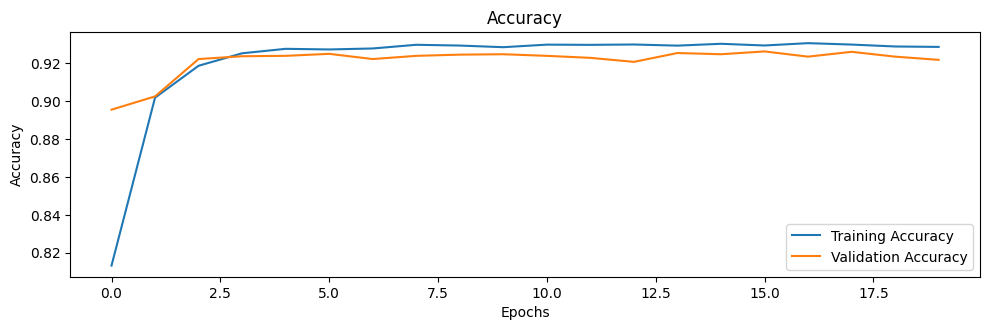

In [ ]:
# Plot the training accuracy and validation accuracy

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)  # First subplot
plt.plot(history_func_df['accuracy'], label='Training Accuracy')
plt.plot(history_func_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()

plt.show()

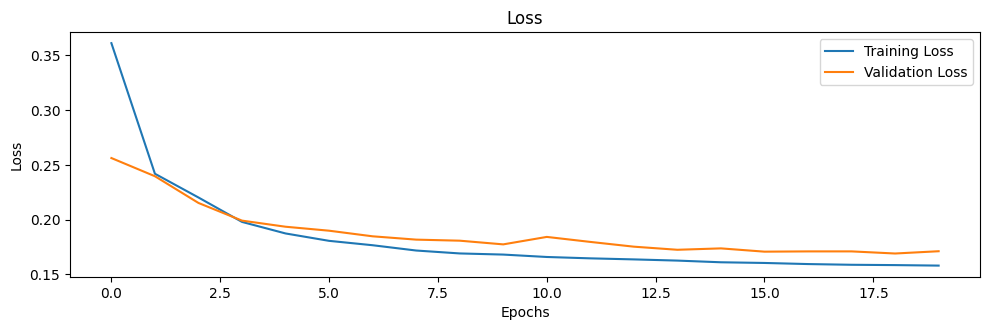

In [ ]:
# Plot the training loss and validation loss

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)  # Second subplot
plt.plot(history_func_df['loss'], label='Training Loss')
plt.plot(history_func_df['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# Model Evaluation of test-set

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_seq >=  0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 1s 974us/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2514
           1       0.91      0.96      0.94      3035

    accuracy                           0.93      5549
   macro avg       0.93      0.92      0.93      5549
weighted avg       0.93      0.93      0.93      5549



Same as previous model, this model appears to be performing well and is not exhibiting clear signs of overfitting or underfitting and it achieves an accuracy of 93% on the test set, indicating its ability to classify instances correctly.

However, further improment could conduct to enhance performance of the models.

## C - Model Improvement - GridSearch

### C.1 - Improve Functional API  

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the model
def create_model(activation='relu', learning_rate=0.001, units=16):
    input_layer = Input(shape=(17,))
    hidden_layer_1 = Dense(units, activation=activation, kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
    hidden_layer_2 = Dense(units, activation=activation, kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)
    
    concat_layer = concatenate([input_layer, hidden_layer_2])
    output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)
    model_functional = Model(inputs=input_layer, outputs=output_layer)
    model_functional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_functional

# Create a KerasClassifier for use with scikit-learn
model = KerasClassifier(build_fn=create_model)

<ipython-input-68-b630bb8470ce>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


In [ ]:
# Define the hyperparameters and their potential values for tuning
parameters = {
    'activation': ['relu', 'sigmoid'],
    'learning_rate': [0.001, 0.01, 0.1],
    'units': [8, 16, 32]
}

In [ ]:
# Initialize the GridSearchCV with the Keras classifier model and the parameter grid

grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=3)
grid_search.fit(X_train, y_train)


836/836 [==============================] - 2s 1ms/step - loss: 0.3107 - accuracy: 0.8518


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1e06d62770>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'units': [8, 16, 32]})

In [ ]:
# Access the best hyperparameters and the best model from the GridSearchCV object

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params

{'activation': 'relu', 'learning_rate': 0.001, 'units': 32}

Based hyperparameter tunning we have best parameter to apply whitin the models

### C.2 - Model Definition

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create Functional API

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

input_layer = Input(shape=(17,))
hidden_layer_1 = Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional_improve = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_improve.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional_improve.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           576         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           1056        ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 49)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

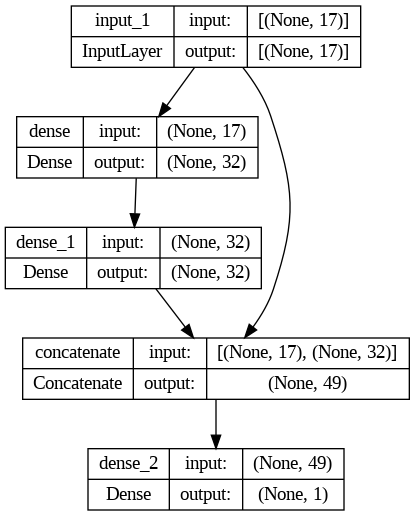

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_functional_improve, show_shapes=True)

### C.3 - Model Training

In [ ]:
%%time

# Convert sparse input data to dense arrays

X_train_dense = X_train.toarray()
X_val_dense = X_val.toarray()

# Training the Model

history_seq_improve = model_functional_improve.fit(X_train_dense,
                                   y_train,
                                   epochs=20,
                                   validation_data=(X_val_dense, y_val),
                                   batch_size=32)

Epoch 1/20
836/836 [==============================] - 3s 2ms/step - loss: 0.3092 - accuracy: 0.8515 - val_loss: 0.2502 - val_accuracy: 0.9021
Epoch 2/20
836/836 [==============================] - 1s 1ms/step - loss: 0.2297 - accuracy: 0.9167 - val_loss: 0.2220 - val_accuracy: 0.9160
Epoch 3/20
836/836 [==============================] - 1s 1ms/step - loss: 0.1998 - accuracy: 0.9254 - val_loss: 0.1981 - val_accuracy: 0.9235
Epoch 4/20
836/836 [==============================] - 1s 1ms/step - loss: 0.1828 - accuracy: 0.9266 - val_loss: 0.1888 - val_accuracy: 0.9254
Epoch 5/20
836/836 [==============================] - 1s 1ms/step - loss: 0.1764 - accuracy: 0.9258 - val_loss: 0.1871 - val_accuracy: 0.9194
Epoch 6/20
836/836 [==============================] - 1s 1ms/step - loss: 0.1721 - accuracy: 0.9257 - val_loss: 0.1804 - val_accuracy: 0.9252
Epoch 7/20
836/836 [==============================] - 1s 2ms/step - loss: 0.1698 - accuracy: 0.9266 - val_loss: 0.1775 - val_accuracy: 0.9211
Epoch 

In [ ]:
# Create DataFrame

history_seq_improve_df = pd.DataFrame(history_seq_improve.history)
history_seq_improve_df

,loss,accuracy,val_loss,val_accuracy
0,0.309236,0.851456,0.250244,0.902056
1,0.229668,0.916673,0.221969,0.916048
2,0.199804,0.925428,0.198147,0.923468
3,0.182807,0.926626,0.188802,0.925376
4,0.176385,0.925803,0.187080,0.919440
5,0.172087,0.925728,0.180412,0.925164
6,0.169828,0.926588,0.177499,0.921136
7,0.166716,0.928122,0.176701,0.921560
8,0.165315,0.928272,0.177369,0.922620
9,0.163995,0.927224,0.174468,0.924528


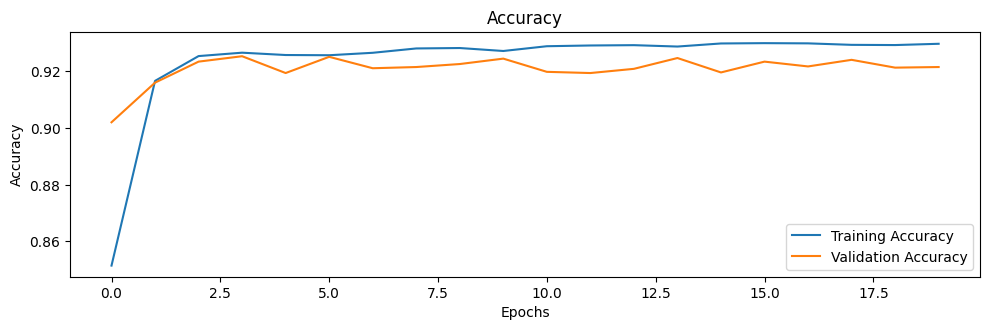

In [ ]:
# Plot the training accuracy and validation accuracy

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)  # First subplot
plt.plot(history_seq_improve_df['accuracy'], label='Training Accuracy')
plt.plot(history_seq_improve_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()

plt.show()

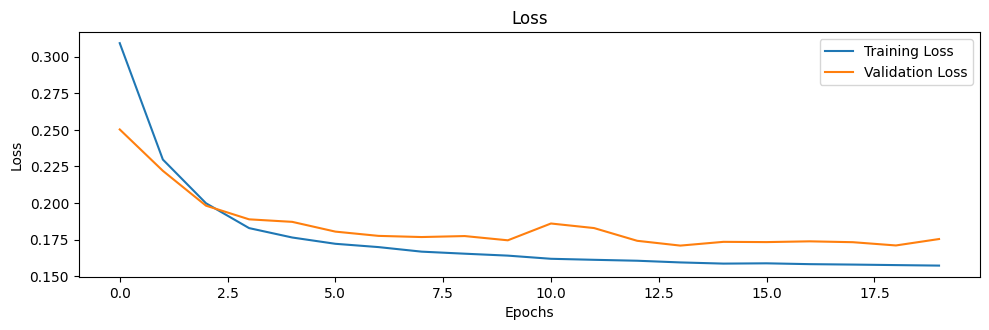

In [ ]:
# Plot the training loss and validation loss

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)  # Second subplot
plt.plot(history_seq_improve_df['loss'], label='Training Loss')
plt.plot(history_seq_improve_df['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# Model Evaluation of test-set

from sklearn.metrics import classification_report

y_pred_seq = model_functional_improve.predict(X_test)
y_pred_seq = np.where(y_pred_seq >=  0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 0s 973us/step
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2514
           1       0.91      0.97      0.94      3035

    accuracy                           0.93      5549
   macro avg       0.93      0.92      0.93      5549
weighted avg       0.93      0.93      0.93      5549



With this model we colud predict the churn of the customer with tendency of exited or not

# 9 - Model Saving

In [ ]:
# Save Pipeline

import pickle

with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [ ]:
# Model Summary

model_sequential_improve.summary()

NameError: ignored

In [ ]:
# Freeze Model

model_functional_improve.trainable = False
model_functional_improve.summary()

In [ ]:
# ave ANN model

model_functional_improve.save('churn_model.h5')

# 10 - Conclusion

## Based on EDA

Based on the provided EDA, the following conclusions can be made:

1. Customer Churn: The company has a relatively high churn rate, with 54.1% of customers choosing to exit or discontinue using the product or service. This indicates a need for improvement in customer retention strategies.

2. Age and Churn: There is no significant variation in churn rate based on age alone. The churn rates range from approximately 53% to 55% across different age groups.

3. Gender and Churn: Both male and female customers have similar churn rates, indicating a balanced representation in terms of churn risk.

4. Region and Churn: The highest churn rate is observed in urban areas (cities), followed by towns and villages. Customer churn is relatively high across all region categories.

5. Membership Category and Churn: Basic and silver membership categories have higher churn rates, while gold, platinum, and premium memberships have low or zero churn rates. Efforts should be made to improve retention among basic and silver members.

6. Joining Trends: The number of joinings fluctuates over time, with variations from month to month. There is a decreasing trend from January 2015 to February 2016, followed by stable counts with some fluctuations. There is an increase in joinings from January 2017 to March 2017, with fluctuations in subsequent months.

7. Average Transaction Value: The majority of users have average transaction values between 1,000 and 3,000 USD. There are a small number of high-value customers who can be targeted with specific initiatives.

8. Login Frequency: On average, users log in approximately 14.66 times during a specific period. The dataset shows the distribution and range of average login frequencies.

9. Complaint Status: A significant portion of exited customers had unresolved concerns, indicating a need for improvement in the company's complaint handling process. Complaints related to poor customer service, poor product quality, and poor website experience were the most common reasons for customer churn.

Based on these findings, the company should focus on enhancing customer retention strategies, addressing customer complaints effectively, improving customer service quality, product quality, and website experience. Efforts should also be made to retain basic and silver members, while leveraging the success in retaining platinum and premium members.

## Based on Model

Based on the Model, the following conclusions can be made:

1. The analysis of the correlation matrix, several variables were found to have strong correlations with the target variable 'churn_risk_score'. These variables include 'membership_category', 'avg_transaction_value', 'point_in_wallet', and 'feedback'. These variables are likely to have a significant impact on predicting customer churn.

2. The absence of missing values in the target variable is a positive aspect as it ensures the availability of complete data for training the model.

3. There are categorical variables such as 'membership_category' and 'feedback' that contain unique values. These variables need to be preprocessed or encoded before they can be used for training the models.

3. The Sequential API and the Functional API both show good performance without clear signs of overfitting or underfitting. They achieve an accuracy of 93% on the test set, indicating their ability to classify instances correctly.

4. The best hyperparameters obtained through hyperparameter tuning are {'activation': 'relu', 'learning_rate': 0.001, 'units': 32}. These parameters can be applied to enhance the model's performance.

Overall, the models have demonstrated good predictive capabilities for identifying customer churn. However, further improvement could be explored to enhance their performance even more.

## Overall Summary

Conclusion:

Based on the analysis conducted, several conclusions can be drawn to understand the churn rate and potential strategies to reduce it:

1. The company has a relatively high churn rate of 54.1%, indicating the need for improvement in customer retention strategies. This should be a top priority for the company.

2. Age and gender do not appear to be significant factors affecting churn. Therefore, the company should focus on other variables to identify and address the reasons behind customer churn.

3. Churn rates are highest in urban areas, followed by towns and villages. This indicates that efforts should be made to improve customer retention across all regions, with particular attention to urban areas.

4. Basic and silver membership categories have higher churn rates, while gold, platinum, and premium memberships have low or zero churn rates. The company should focus on improving retention strategies for basic and silver members to reduce their churn.

5. The number of joinings fluctuates over time, but there is a noticeable increase in joinings from January 2017 to March 2017. The company should analyze the reasons behind this increase and try to replicate successful strategies to attract new customers.

6. Most users have average transaction values between 1,000 and 3,000 USD. The company can target high-value customers with specific initiatives to retain them and enhance their loyalty.

7. The average login frequency is approximately 14.66 times during a specific period. This information can be utilized to design personalized engagement strategies and encourage customers to use the product or service more frequently.

8. A significant portion of exited customers had unresolved concerns, emphasizing the need to improve the complaint handling process. Addressing complaints related to customer service, product quality, and website experience can help in reducing churn.

Suggestion:

To reduce the churn rate, the company should consider implementing the following strategies:

1. Enhance customer retention strategies: Identify the factors that contribute to customer churn and develop targeted retention initiatives. These initiatives could include loyalty programs, personalized offers, and proactive customer support.

2. Improve complaint handling process: Streamline the complaint resolution process to address customer concerns promptly and effectively. This may involve training customer support staff, implementing a ticketing system, and closely monitoring complaint resolution metrics.

3. Enhance customer service quality: Invest in training and development programs for customer service representatives to improve their skills and provide exceptional customer experiences. This can help in building stronger relationships with customers and reducing churn.

4. Improve product quality: Conduct regular quality checks to ensure that the product or service meets customer expectations. Solicit feedback from customers and use it to make necessary improvements.

5. Enhance website experience: Optimize the company's website to provide a seamless and user-friendly experience. This can include improving site speed, simplifying navigation, and ensuring the availability of relevant information.

6. Retain basic and silver members: Analyze the reasons behind churn among basic and silver members and develop strategies to increase their engagement and satisfaction. This could involve offering exclusive benefits, targeted promotions, and personalized communication.

7. Leverage success in retaining platinum and premium members: Identify the factors contributing to the high retention rates of platinum and premium members and replicate those strategies for other membership categories. This may involve providing additional perks, rewards, or exclusive access to premium features.

8. Continuously monitor and analyze churn metrics: Regularly assess churn metrics and conduct ongoing analysis to identify emerging patterns and trends. This can help in proactively addressing potential issues and refining retention strategies.

By implementing these suggestions, the company can work towards reducing the churn rate, improving customer satisfaction, and ultimately driving long-term growth and profitability.